In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##Agenda for Lecture

*   Announcements
*   Notation for linear regression
*   Slope interpretations
*   Types of variables
*   Nonlinear tranformations




# Multiple Linear Regression Model

The **Multiple Linear Regression Model** forms the basis for many statistical and machine learning models. The model expresses a linear relationship between a dependent variable $Y$ and multiple independent variables $X_1, X_2, \dots, X_k$. This model is expressed as

\begin{equation}
Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \dots + \beta_kX_k + \epsilon,
\end{equation}

$\beta_0$ is the population **intercept** or **constant term**, and the remaining $\beta_i$'s are the **slopes**, **coefficients**, or **weights**.

We could also pack all of the independent variables into a Matrix and write the model as

\begin{equation}
\mathbf{Y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\epsilon}
\end{equation}

where:

\begin{equation}
\mathbf{Y} =
\begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{pmatrix},
\quad
\mathbf{X} =
\begin{pmatrix}
1 & x_{1,1} & x_{2,1} & \dots & x_{k,1} \\
1 & x_{1,2} & x_{2,2} & \dots & x_{k,1} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{1,n} & x_{2,n} & \dots & x_{k,n}
\end{pmatrix},
\quad
\boldsymbol{\beta} =
\begin{pmatrix}
\beta_0 \\
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_k
\end{pmatrix},
\quad
\boldsymbol{\epsilon} =
\begin{pmatrix}
\epsilon_1 \\
\epsilon_2 \\
\vdots \\
\epsilon_n
\end{pmatrix}
\end{equation}


It is important to distinguish between a **model** and the **estimation** of the model. Suppose I'd like to estimate the impact of years of education on unemployment and I have **panel** data from a survey sent to the same 1000 people every year for 10 years. I could write

\begin{equation}
Income_{it} = \beta_0 + \beta_1YoE_{it} + \epsilon_{it},
\end{equation}

(Note in this formulation, we've written the model in the context of an arbitrary observation.) This is a **linear regression model** but we've made no statements about how this model will be estimated thus far. There are many techniques we might use to estimate this regression model.

Each individual $i$ has survey responses associated with time $t$. For example, if the 242nd survey respondent had an income of \$37,450 in 2003 when they had 14 years of education, we could write, $Income_{242, 2003} = 37450$ and $YoE_{242, 2003} = 14$.

Note that at this point we are making assumptions/hypotheses about the **population**. When we move onto estimation, we will take **samples** in order to estimate the **population parameters** like the intercept and slopes. Our estimates are the **sample parameters**.


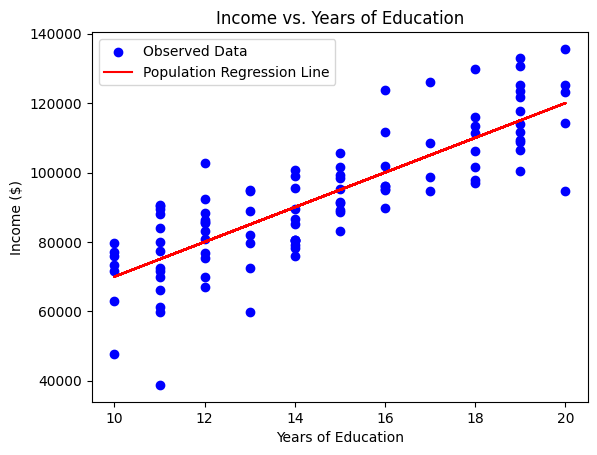

In [2]:
# Set seed for reproducibility
np.random.seed(16)

# Define the number of observations
n = 100

# Define the population regression parameters
beta_0 = 20_000  # Intercept (base income)
beta_1 = 5_000   # Coefficient for years of education (additional income per year of education)

# Generate random years of education (between 10 and 20 years)
years_of_education = np.random.randint(10, 21, n)

# Generate random error terms (normally distributed with mean 0 and standard deviation 10,000)
errors = np.random.normal(0, 10_000, n)

# Calculate incomes based on the population regression model
incomes = beta_0 + beta_1 * years_of_education + errors

# Create the scatter plot of the data points
plt.scatter(years_of_education, incomes, color='blue', label='Observed Data')

# Plot the population regression line (without error terms)
population_incomes = beta_0 + beta_1 * years_of_education
plt.plot(years_of_education, population_incomes, color='red', label='Population Regression Line')

# Add labels and title
plt.xlabel('Years of Education')
plt.ylabel('Income ($)')
plt.title('Income vs. Years of Education')
plt.legend()

# Show the plot
plt.show()

In [3]:
# Display the first 10 observations
n_display = 10

# Y vector (incomes)
Y = incomes[:n_display].reshape(-1, 1)

# X matrix (with intercept and years of education)
X = np.column_stack((np.ones(n_display), years_of_education[:n_display]))

# Beta vector (using the population parameters)
beta = np.array([beta_0, beta_1]).reshape(-1, 1)

# Epsilon vector (errors)
epsilon = errors[:n_display].reshape(-1, 1)

# Create a DataFrame for neat display
df_Y = pd.DataFrame(Y, columns=['Y (Income)'])
df_X = pd.DataFrame(X, columns=['Intercept', 'Years of Education'])
df_beta = pd.DataFrame(beta, columns=['Beta'])
df_epsilon = pd.DataFrame(epsilon, columns=['Epsilon (Error)'])

# Display the matrices/vectors
print("Y (Income) Vector:")
print(df_Y, "\n")

print("X (Design Matrix):")
print(df_X, "\n")

print("Beta (Coefficients) Vector:")
print(df_beta, "\n")

print("Epsilon (Error) Vector:")
print(df_epsilon)

Y (Income) Vector:
      Y (Income)
0  109494.354975
1  130654.263532
2   89204.985611
3   59931.755034
4   80466.961098
5  100740.917952
6  111705.119174
7   73460.515010
8   77178.946709
9  113261.010968 

X (Design Matrix):
   Intercept  Years of Education
0        1.0                19.0
1        1.0                19.0
2        1.0                15.0
3        1.0                11.0
4        1.0                14.0
5        1.0                14.0
6        1.0                19.0
7        1.0                10.0
8        1.0                10.0
9        1.0                18.0 

Beta (Coefficients) Vector:
    Beta
0  20000
1   5000 

Epsilon (Error) Vector:
   Epsilon (Error)
0     -5505.645025
1     15654.263532
2     -5795.014389
3    -15068.244966
4     -9533.038902
5     10740.917952
6     -3294.880826
7      3460.515010
8      7178.946709
9      3261.010968


## Slope Interpretations

Slope interpretations are *very* important. There are many instances of analysts applying extremely complicated machine learning techniques to estimate slopes, but then being unable to interpret the estimates in a meaningful way.

$\beta_i$ is the rate of change of $Y$ with respect to $X_i$. Since we are considering a linear model, this rate of change is constant, so we can say things like, "when $X_i$ increases by one, $Y$ increases by $\beta_i$." If we have multiple independent variables, then we need to say ""when $X_i$ increases by one, $Y$ increases by $\beta_i$ holding other independent variables constant," because some of the independent variable might be correlated.

In the above example, we might say "when years of education increases by one, salary increases by \$5000."

Note that since we will rarely directly observe $\beta_i$ since it is a population parameter, and will estimate it from a sample, we often add phrases like "on average in the sample data" to the above interpretations when we apply them to actual slope estimates.

## Types of Variables

1. **Continuous Variables**

Definition: Continuous variables can take any value within a given range. These values are usually measured and can be fractional or decimal.

Examples: \\
Income: $35,672.75$ \\
Height: $1.75$ meters \\
Temperature: $22.3$ degrees Celsius \\

2. **Categorical Variables**

Definition: Categorical variables take on a limited, fixed number of possible values, representing different categories or groups. These values are typically labels or names.

Examples: \\
Marital Status: Single, Married, Divorced \\
Blood Type: A, B, AB, O \\

We generally code non-ordinal categoricals as 0 or 1. We might have a variable called $Female_i$ in our data that is equal to 1 if the survey respondent is female and 0 otherwise.

3. *Ordinal Variables*

Definition: Ordinal variables are a type of categorical variable with a meaningful order or ranking among the categories, but the intervals between ranks are not necessarily equal.

Examples:
Education Level: High School, Bachelor’s, Master’s, PhD \\
Satisfaction Level: Very Unsatisfied, Unsatisfied, Neutral, Satisfied, Very Satisfied \\
Socioeconomic Status: Low, Middle, High \\

4. *Binary (Dichotomous) Variables*

Definition: Binary variables are a special case of categorical variables with only two possible values. \\

Examples: \\
Has Diabetes: Yes, No \\
Employed: Yes, No \\
Voting: Voted, Did Not Vote \\

Note that these variables could be independent or dependent variables in a regression model. Estimation techniques often vary depending on how these types of variables appear in a model.

Slope interpretations on these types of variables can follow the format outlined above but that would often lead to awkwardness. For example, consider a model with a variable called $Blood\_Type\_A$ that is equal to one when the individial is Blood Type A and is otherwise equal to zero. "when Blood Type A increases by one, $Y$ increases by $\beta_{BTA}$" is awkward.  Instead we could say something like, "$Y$ is $\beta_{BTA}$ different for individuals with Blood Type A on average in the population holding other independent variables constant." Note that I've claimed here that the coefficient on a binary variable is the same as a difference-in-means. You will prove this in the homework.

One of the key benefits of the regression model is the ability to "partial out" conditional information. This example is most clear with difference-in-means: we can compare means while "partialing out" or "controlling for" other factors we believe impact the comparison.

Let's look at some examples of scatter plots and regression lines with binary variables.

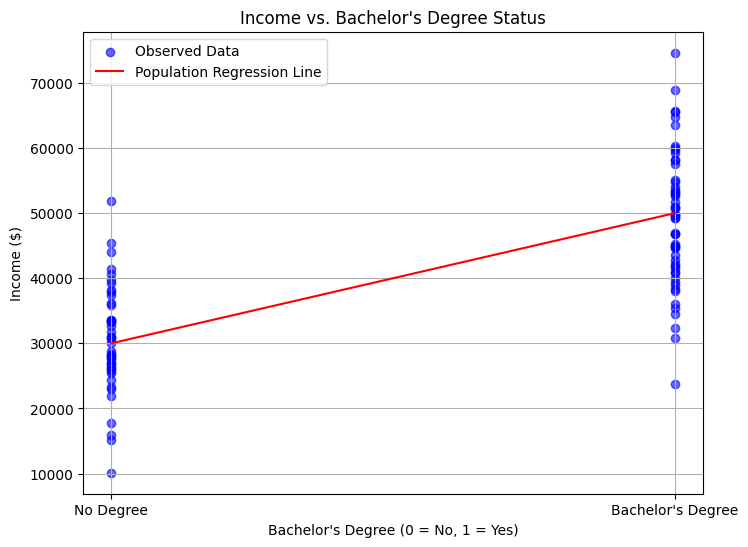

In [4]:
# Set seed for reproducibility
np.random.seed(42)

# Generate data
n = 100  # number of observations
bachelors_degree = np.random.choice([0, 1], size=n)  # 0 = No degree, 1 = Bachelor's degree

# Population regression parameters
intercept = 30_000  # Base income without a degree
degree_premium = 20_000  # Additional income for having a Bachelor's degree

# Generate incomes based on the binary variable
income = intercept + degree_premium * bachelors_degree + np.random.normal(0, 10_000, size=n)

# Plotting the scatter plot with binary variable
plt.figure(figsize=(8, 6))
plt.scatter(bachelors_degree, income, color='blue', label='Observed Data', alpha=0.6)

# Plot the population regression line
x_values = np.array([0, 1])
y_values = intercept + degree_premium * x_values
plt.plot(x_values, y_values, color='red', label='Population Regression Line')

# Adding labels and title
plt.xlabel("Bachelor's Degree (0 = No, 1 = Yes)")
plt.ylabel('Income ($)')
plt.title('Income vs. Bachelor\'s Degree Status')
plt.xticks([0, 1], ['No Degree', 'Bachelor\'s Degree'])
plt.legend()
plt.grid(True)
plt.show()


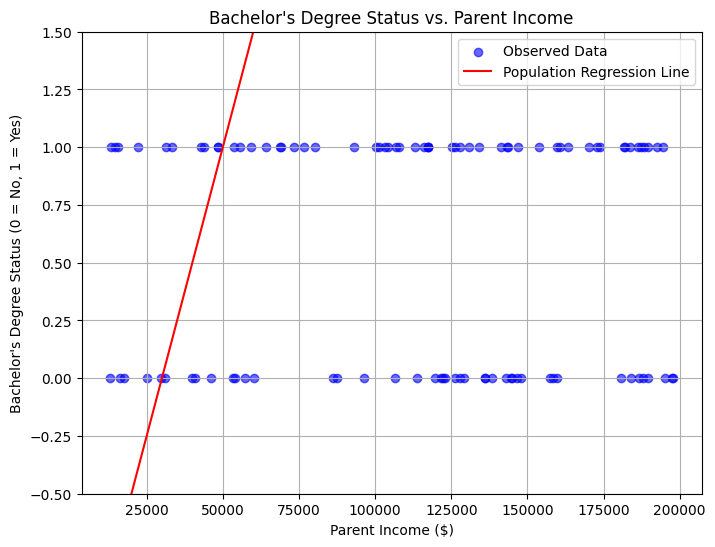

In [5]:
# Strengthened relationship
slope = 0.00005
intercept = -1.5  # Adjusted intercept to keep the probabilities realistic

parent_income = np.random.randint(10000, 200000, n)

# Estimate probability with stronger relationship
predicted_prob = intercept + slope * parent_income

# Clip probabilities to be within [0, 1] range, for realism (though this is not typical in linear models)
predicted_prob = np.clip(predicted_prob, 0, 1)

# Plotting the scatter plot with adjusted y range
plt.figure(figsize=(8, 6))
plt.scatter(parent_income, bachelors_degree, color='blue', label='Observed Data', alpha=0.6)

# Plot the population regression line
x_values = np.linspace(parent_income.min(), parent_income.max(), 100)
y_values = intercept + slope * x_values
plt.plot(x_values, y_values, color='red', label='Population Regression Line')

# Adding labels and title
plt.xlabel('Parent Income ($)')
plt.ylabel("Bachelor's Degree Status (0 = No, 1 = Yes)")
plt.title('Bachelor\'s Degree Status vs. Parent Income')
plt.ylim(-0.5, 1.5)  # Set y-axis range to [-0.5, 1.5]
plt.legend()
plt.grid(True)
plt.show()

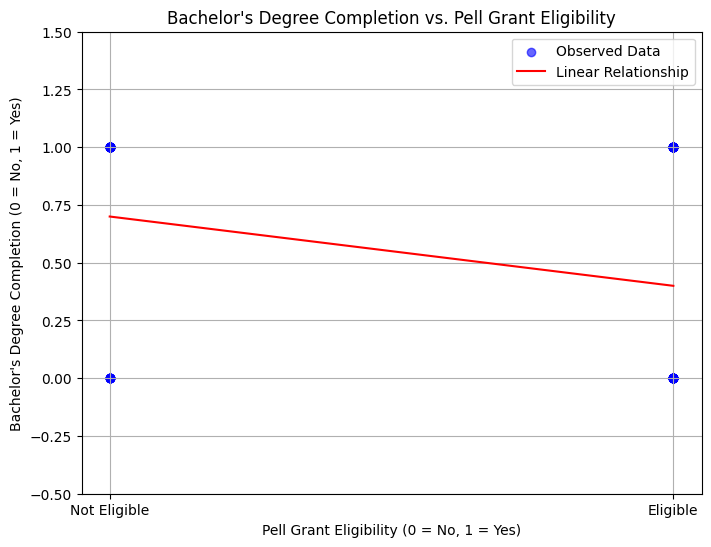

In [6]:
# Set seed for reproducibility
np.random.seed(16)

# Number of observations
n = 100

# Generate Pell Grant eligibility with some baseline probability
pell_grant_prob = 0.5
pell_grant_eligible = np.random.binomial(1, pell_grant_prob, n)

# Generate Bachelors Degree Completion with a negative correlation to Pell Grant Eligibility
# Higher probability of degree completion if not eligible for Pell Grant
degree_completion_prob = 0.7 - 0.3 * pell_grant_eligible  # Linear relationship

# Generate binary outcomes based on these probabilities
bachelors_degree = np.random.binomial(1, degree_completion_prob, n)

# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pell_grant_eligible, bachelors_degree, color='blue', label='Observed Data', alpha=0.6)

# Plot the linear relationship (regression line)
x_values = np.array([0, 1])
y_values = 0.7 - 0.3 * x_values
plt.plot(x_values, y_values, color='red', label='Linear Relationship')

# Adding labels and title
plt.xlabel('Pell Grant Eligibility (0 = No, 1 = Yes)')
plt.ylabel("Bachelor's Degree Completion (0 = No, 1 = Yes)")
plt.title('Bachelor\'s Degree Completion vs. Pell Grant Eligibility')
plt.xticks([0, 1], ['Not Eligible', 'Eligible'])
plt.ylim(-0.5, 1.5)  # Set y-axis range to [-0.5, 1.5] for clarity
plt.legend()
plt.grid(True)
plt.show()

##Nonlinear Transformations in Linear Regression Models

In regression, the dependent variable is assumed to have a linear relationship with the independent variables. This means that the model assumes a change in the dependent variable is proportional to the change in the independent variables. (This is implied by regression equations above.)

However, nonlinear transformations of individual independent variables can be useful within a linear regression model. These transformations allow the model to capture more complex relationships between the independent variables and the dependent variable, while still maintaining the overall linear structure of the model.

**Examples**

1. **Logarithmic tranformations**

a. *linear-log*

$y_i = \beta_0 + \beta_1 \log(x_i) + \epsilon_i$

Slope interpretation: We expect $y_i$ to increase by $\beta_1/100$ for each 1\% increase in $x_i$. This interpretation works for small changes in $x_i$. For larger changes, we'd say $y_i$ to increase by $\beta_1 \times \log(1 + \%\Delta)$ for each $\%\Delta$ increase in $x_i$. For example, a 10\% increase in $x_i$ leads to a $\beta_1 \times \log(1.1)$ change in $y_i$ on average.

b. *log-linear transformation*

Suppose we believe that a stock price grows at a constant percentage rate over time on average but with error. We might write,

$p_t =p_oe^{rt + \epsilon_t}$,

where $p_t$ is the price of the stock at time $t$, $p_o$ is the price of the stock at $t = 0$ and $r$ is the average growth rate of the stock.

Taking natural logs of both sides gives

$ln(p_t) = ln(p_0) + rt + \epsilon_t$

We can write the regression model

$ln(p_t) = \beta_o + \beta_tt + \epsilon_t$

to represent such a situation. The slope estimate is the average percentage change in the dependent variable per time period. We could add other variables to the model to the extent we believed they impacted the growth rate of the stock.

c. *log-log transormations*

$log(q_d) = \beta_0 + \beta_1\log(p_d) +\epsilon_i$

The *price elasticity of demand* is an important quantity in economics. It is the the quitient od the percentage change in quantity over the percentage change in price. $\beta_1$ represents this elasticity in the above regression, and this interpretation can be generalized to other variables. (Note we'd need to be very careful estimating this regression based on the simultaneity issue we discussed in the first lecture.)

2. **Polynomial Transformations**

Maybe we believe that the impact of $x_i$ on $y_i$ diminishes or accelerates as $x_i$ increases. For example, the impact of advertising on sales might diminish as the best target markets are targeted first. We could use polynomial transformations to model these types of situations:

$Sales_t = \beta_0 + \beta_1 AdBudget_t + \beta_2AdBudget^2_t + \epsilon_t $

How do we interpret the impact of Adverstising budget on sales in this situation? Adding too many polynomial terms to a regression model often leads to "overfitting."

3. Some other common transformations similar to those above include square root, reciprocal, and exponential transformations.

4. **Interaction terms**

Interaction terms involve multiplying independent variables together. Interpretations change depending on the types of variables being multiplied. For example, we might multiply two binary categorical variables together to create a new binary variable. You will work some more interpretations out on the homework.

Example: Consider a comparison of Gasoline prices in Utah and California based on the following regression model:

$GasolinePrice_{st} = \beta_0 + \beta_1OilPrice_{st} + \beta_2California_{s} + \beta_3OilPrice_{st} \times California_{s} + \epsilon_{st} $

where $GasolinePrice_{st}$ is the gasoline price in state $s$ at time $t$ (probably an average price). $OilPrice_{st}$ is the oil price in state $s$ at time $t$. $California_{st}$ is a categorical variable that is equal to one if the observation is from California and is equal to zero otherwise. Note in this case the observation is from Utah if $California_{st} = 0$. We do not want to include a $Utah_{st}$ variable in this model as it would not provide additional information. However, if we added third state, Idaho, then we could add a second categorical called $Utah_{st}$ or $Idaho_{st}$ but no both. Note that we also include an interaction term, $OilPrice_{st} \times California_{st}$. Let's breakdown the equation by observation source to help with interpretation.

Utah Equation: $GasolinePrice_{Utah,t} = \beta_0 + \beta_1OilPrice_{Utah,t} +\epsilon_{Utah, t} $

Note that all observations from California fall out of the model since $California_{st} = 0$. $\beta_o$ is the Utah specific constant or intercept, while $\beta_1$ is the Utah specific slope.

California Equation: $GasolinePrice_{Cal, t} = (\beta_0 + \beta_2) + (\beta_1+\beta_3)OilPrice_{Utah,t} + \epsilon_{Utah, t} $

Note the simplification and rearrangement but substituting $California_{Cal, t}=1$. $(\beta_0 + \beta_2)$ is the California intercept term, while $(\beta_1+\beta_3)$ is the California slope. For example we might say "$\beta_2$ represents the difference in average gasoline prices between Utah and California, holding oil prices constant." We might say "$\beta_3$ is the average difference in the impact of oil prices on gasoline prices in California relative to Utah."

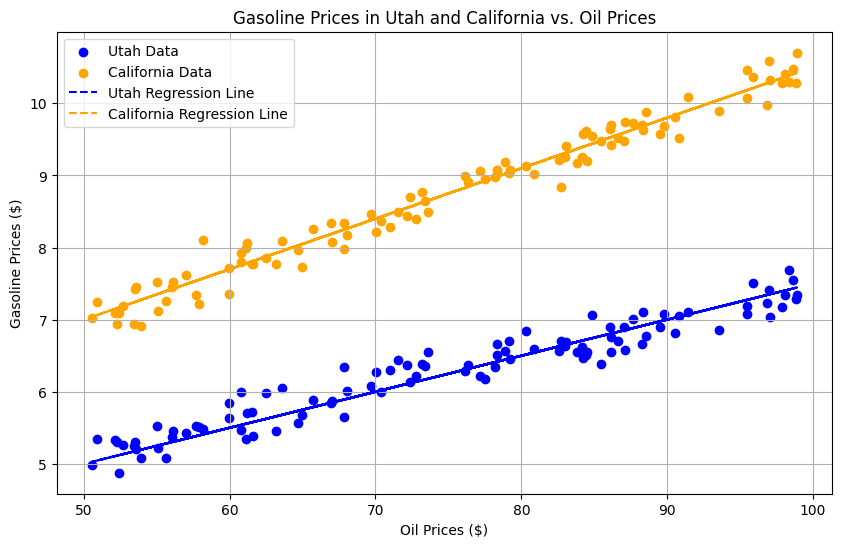

In [7]:
# Set seed for reproducibility
np.random.seed(16)

# Number of observations
n = 100

# Simulate oil prices (OilPrice_t)
oil_prices = np.random.uniform(50, 100, n)  # Oil prices between $50 and $100

# Define coefficients
beta_0 = 2.5   # Utah intercept
beta_1 = 0.05  # Utah slope with respect to oil prices
beta_2 = 1.0   # Difference in intercept for California
beta_3 = 0.02  # Difference in slope for California

# Error term
epsilon_utah = np.random.normal(0, 0.2, n)  # Random noise for Utah
epsilon_california = np.random.normal(0, 0.2, n)  # Random noise for California

# Simulate gasoline prices for Utah (California = 0)
gasoline_prices_utah = beta_0 + beta_1 * oil_prices + epsilon_utah

# Simulate gasoline prices for California (California = 1)
gasoline_prices_california = (beta_0 + beta_2) + (beta_1 + beta_3) * oil_prices + epsilon_california

# Combine data for plotting
oil_prices_combined = np.concatenate([oil_prices, oil_prices])
gasoline_prices_combined = np.concatenate([gasoline_prices_utah, gasoline_prices_california])
states = np.array(['Utah'] * n + ['California'] * n)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(oil_prices, gasoline_prices_utah, color='blue', label='Utah Data')
plt.scatter(oil_prices, gasoline_prices_california, color='orange', label='California Data')

# Plot regression lines
plt.plot(oil_prices, beta_0 + beta_1 * oil_prices, color='blue', linestyle='--', label='Utah Regression Line')
plt.plot(oil_prices, (beta_0 + beta_2) + (beta_1 + beta_3) * oil_prices, color='orange', linestyle='--', label='California Regression Line')

# Adding labels and title
plt.xlabel('Oil Prices ($)')
plt.ylabel('Gasoline Prices ($)')
plt.title('Gasoline Prices in Utah and California vs. Oil Prices')
plt.legend()
plt.grid(True)
plt.show()


In general, categorical variables allow us to shift the intercept for different categories, while interactions between a categorical and continuous variable allow us to shift around slopes.

Estimated intercept (Utah, correct model): 2.658732089973504
Estimated slope for oil prices (correct model): 0.04827709406398701
Estimated California intercept shift (correct model): 0.9628405725883794
Estimated intercept (incorrect model): 3.140152376267695
Estimated slope for oil prices (incorrect model): 0.048277094063986996


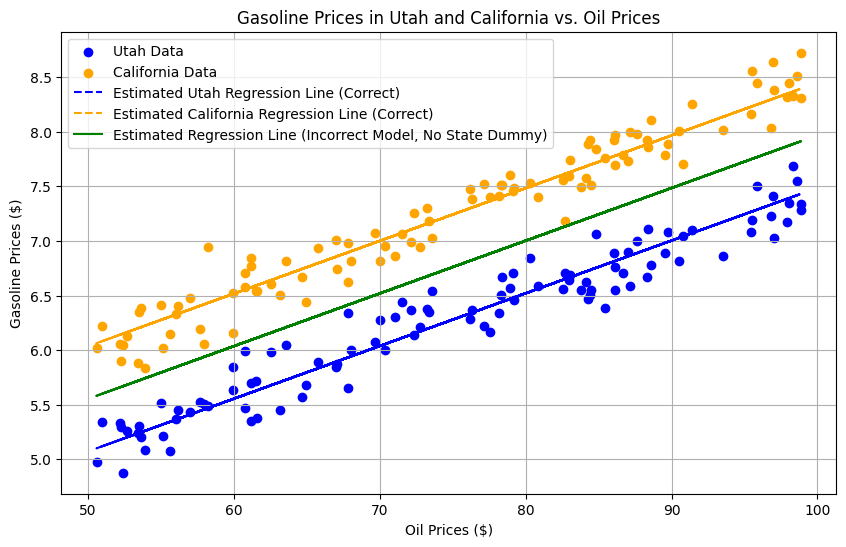

In [8]:
from sklearn.linear_model import LinearRegression

# Set seed for reproducibility
np.random.seed(16)

# Number of observations
n = 100

# Simulate oil prices (OilPrice_t)
oil_prices = np.random.uniform(50, 100, n)  # Oil prices between $50 and $100

# Define population coefficients
beta_0 = 2.5   # Utah intercept
beta_1 = 0.05  # slope with respect to oil prices
beta_2 = 1.0   # Difference in intercept for California

# Error term
epsilon_utah = np.random.normal(0, 0.2, n)  # Random noise for Utah
epsilon_california = np.random.normal(0, 0.2, n)  # Random noise for California

# Simulate gasoline prices for Utah (California = 0)
gasoline_prices_utah = beta_0 + beta_1 * oil_prices + epsilon_utah

# Simulate gasoline prices for California (California = 1)
gasoline_prices_california = (beta_0 + beta_2) + beta_1 * oil_prices + epsilon_california

# Combine data for regression
oil_prices_combined = np.concatenate([oil_prices, oil_prices])
gasoline_prices_combined = np.concatenate([gasoline_prices_utah, gasoline_prices_california])
states_combined = np.array([0] * n + [1] * n)  # 0 for Utah, 1 for California

# Create a DataFrame for regression
df = pd.DataFrame({
    'OilPrice': oil_prices_combined,
    'State': states_combined,
    'GasolinePrice': gasoline_prices_combined
})

# Fit the correct model with oil prices and a dummy for California
X_correct = df[['OilPrice', 'State']]
y = df['GasolinePrice']
model_correct = LinearRegression().fit(X_correct, y)

# Get the estimated coefficients for the correct model
intercept_correct = model_correct.intercept_
beta_1_estimated_correct = model_correct.coef_[0]  # Slope for oil prices
beta_2_estimated_correct = model_correct.coef_[1]  # Shift for California

# Fit the incorrect model (without the California dummy)
X_incorrect = df[['OilPrice']]  # Only use oil prices, no state dummy
model_incorrect = LinearRegression().fit(X_incorrect, y)

# Get the estimated coefficients for the incorrect model
intercept_incorrect = model_incorrect.intercept_
beta_1_estimated_incorrect = model_incorrect.coef_[0]

# Print the estimated coefficients
print(f"Estimated intercept (Utah, correct model): {intercept_correct}")
print(f"Estimated slope for oil prices (correct model): {beta_1_estimated_correct}")
print(f"Estimated California intercept shift (correct model): {beta_2_estimated_correct}")
print(f"Estimated intercept (incorrect model): {intercept_incorrect}")
print(f"Estimated slope for oil prices (incorrect model): {beta_1_estimated_incorrect}")

# Plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(oil_prices, gasoline_prices_utah, color='blue', label='Utah Data')
plt.scatter(oil_prices, gasoline_prices_california, color='orange', label='California Data')

# Plot the estimated regression lines for the correct model
plt.plot(oil_prices, intercept_correct + beta_1_estimated_correct * oil_prices, color='blue', linestyle='--', label='Estimated Utah Regression Line (Correct)')
plt.plot(oil_prices, (intercept_correct + beta_2_estimated_correct) + beta_1_estimated_correct * oil_prices, color='orange', linestyle='--', label='Estimated California Regression Line (Correct)')

# Plot the estimated regression line for the incorrect model
plt.plot(oil_prices, intercept_incorrect + beta_1_estimated_incorrect * oil_prices, color='green', linestyle='-', label='Estimated Regression Line (Incorrect Model, No State Dummy)')

# Adding labels and title
plt.xlabel('Oil Prices ($)')
plt.ylabel('Gasoline Prices ($)')
plt.title('Gasoline Prices in Utah and California vs. Oil Prices')
plt.legend()
plt.grid(True)
plt.show()

Estimated intercept (Utah, correct model): 2.591541571255756
Estimated slope for oil prices (correct model): 0.04859633774638225
Estimated California intercept shift (correct model): 1.004900180357819
Estimated intercept (incorrect model): 0.9400228653854796
Estimated slope for oil prices (incorrect model): 0.0783395625256367


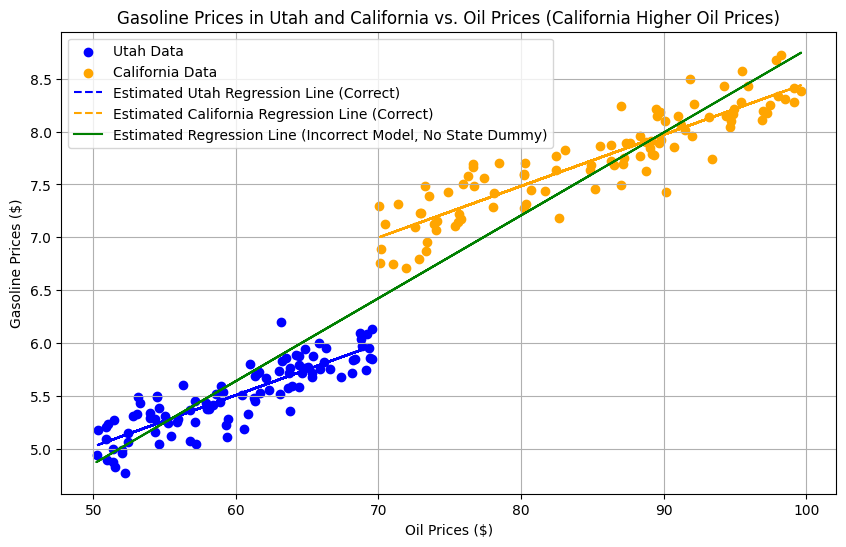

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Set seed for reproducibility
np.random.seed(16)

# Number of observations per state
n = 100

# Simulate oil prices for Utah and California (California has higher oil prices on average)
oil_prices_utah = np.random.uniform(50, 70, n)  # Oil prices between $50 and $70 in Utah
oil_prices_california = np.random.uniform(70, 100, n)  # Oil prices between $70 and $100 in California

# Define population coefficients
beta_0 = 2.5   # Utah intercept
beta_1 = 0.05  # slope with respect to oil prices
beta_2 = 1.0   # Difference in intercept for California

# Error term
epsilon_utah = np.random.normal(0, 0.2, n)  # Random noise for Utah
epsilon_california = np.random.normal(0, 0.2, n)  # Random noise for California

# Simulate gasoline prices for Utah (California = 0)
gasoline_prices_utah = beta_0 + beta_1 * oil_prices_utah + epsilon_utah

# Simulate gasoline prices for California (California = 1)
gasoline_prices_california = (beta_0 + beta_2) + beta_1 * oil_prices_california + epsilon_california

# Combine data for regression
oil_prices_combined = np.concatenate([oil_prices_utah, oil_prices_california])
gasoline_prices_combined = np.concatenate([gasoline_prices_utah, gasoline_prices_california])
states_combined = np.array([0] * n + [1] * n)  # 0 for Utah, 1 for California

# Create a DataFrame for regression
df = pd.DataFrame({
    'OilPrice': oil_prices_combined,
    'State': states_combined,
    'GasolinePrice': gasoline_prices_combined
})

# Fit the correct model with oil prices and a dummy for California
X_correct = df[['OilPrice', 'State']]
y = df['GasolinePrice']
model_correct = LinearRegression().fit(X_correct, y)

# Get the estimated coefficients for the correct model
intercept_correct = model_correct.intercept_
beta_1_estimated_correct = model_correct.coef_[0]  # Slope for oil prices
beta_2_estimated_correct = model_correct.coef_[1]  # Shift for California

# Fit the incorrect model (without the California dummy)
X_incorrect = df[['OilPrice']]  # Only use oil prices, no state dummy
model_incorrect = LinearRegression().fit(X_incorrect, y)

# Get the estimated coefficients for the incorrect model
intercept_incorrect = model_incorrect.intercept_
beta_1_estimated_incorrect = model_incorrect.coef_[0]

# Print the estimated coefficients
print(f"Estimated intercept (Utah, correct model): {intercept_correct}")
print(f"Estimated slope for oil prices (correct model): {beta_1_estimated_correct}")
print(f"Estimated California intercept shift (correct model): {beta_2_estimated_correct}")
print(f"Estimated intercept (incorrect model): {intercept_incorrect}")
print(f"Estimated slope for oil prices (incorrect model): {beta_1_estimated_incorrect}")

# Plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(oil_prices_utah, gasoline_prices_utah, color='blue', label='Utah Data')
plt.scatter(oil_prices_california, gasoline_prices_california, color='orange', label='California Data')

# Plot the estimated regression lines for the correct model
plt.plot(oil_prices_utah, intercept_correct + beta_1_estimated_correct * oil_prices_utah, color='blue', linestyle='--', label='Estimated Utah Regression Line (Correct)')
plt.plot(oil_prices_california, (intercept_correct + beta_2_estimated_correct) + beta_1_estimated_correct * oil_prices_california, color='orange', linestyle='--', label='Estimated California Regression Line (Correct)')

# Plot the estimated regression line for the incorrect model
plt.plot(oil_prices_combined, intercept_incorrect + beta_1_estimated_incorrect * oil_prices_combined, color='green', linestyle='-', label='Estimated Regression Line (Incorrect Model, No State Dummy)')

# Adding labels and title
plt.xlabel('Oil Prices ($)')
plt.ylabel('Gasoline Prices ($)')
plt.title('Gasoline Prices in Utah and California vs. Oil Prices (California Higher Oil Prices)')
plt.legend()
plt.grid(True)
plt.show()